In [ ]:
#interactive plotting in separate window
%matplotlib qt 
#%matplotlib inline 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.optimize import curve_fit

In [2]:
#reading data
data_df = pd.read_csv('data/E112T1p6_map_E=minus30-100_q=0-15.txt', comment = "#")

In [3]:
from modules.Sub_functions import readMap, Qcut, PhononMask

In [4]:
Q_arr, E_arr, S_arr = readMap(data_df)

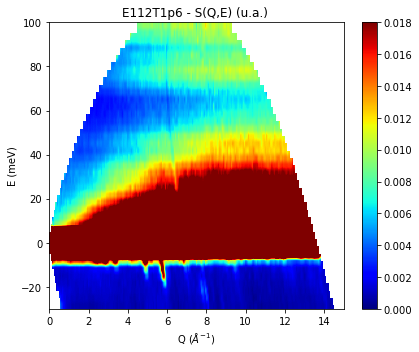

In [5]:
#plotting
x= Q_arr
y= E_arr
z = S_arr
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)

fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [0,15,-30,100], vmin=0,vmax = 0.018, cmap='jet')# X, Y, Z,5000,vmin=0,vmax = 0.43, cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('E112T1p6 - S(Q,E) (u.a.) ')
plt.tight_layout()
plt.show()
fig.savefig("./figures/E112T1p6.png")

In [6]:
S_int, ratio = Qcut(Q_arr, E_arr, S_arr, 7, 0.8, 6.7, 99)

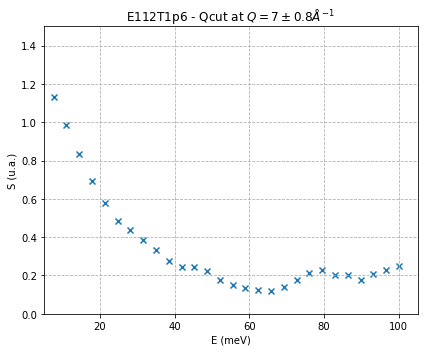

In [7]:
fig =plt.figure(figsize=(6, 5))
plt.grid(linestyle='--')
plt.title('E112T1p6 - Qcut at $Q = 7 \pm 0.8 \AA ^{-1}$')  
plt.ylabel('S (u.a.)')
plt.xlabel('E (meV)')
plt.scatter(E_arr, S_int, marker = 'x')
plt.xlim([5.1,105])
plt.ylim([0,1.5])
plt.tight_layout()
plt.show()
fig.savefig("./figures/E112T1p6_Qcut.png")

In [8]:
from modules.fitQ import fitQdistrib, fit_func

In [9]:
#reading data
mantid_df = pd.read_csv('data/cut_E112T1p6_E_47_dE_5.dat')
mantid_df = mantid_df.dropna()

In [10]:
popt_47, pcov_47, Q_arr_47, S_arr_47, S_err_47, Q_ex_47, S_ex_47, Q_fit_47, res_47, S_err_fit_47 = fitQdistrib(mantid_df, 2.3, 11.5, 6.21, 6.66)

In [11]:
S_mask = PhononMask(Q_arr, E_arr, S_arr, S_int, 7, 6.7, 99, popt_47)

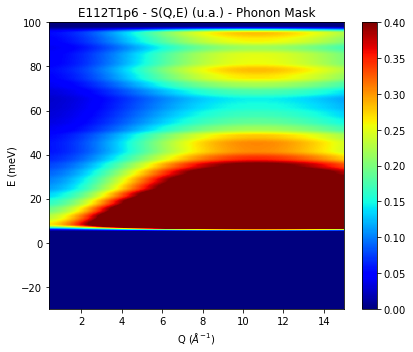

In [12]:
x= Q_arr
y= E_arr
z = np.array(S_mask)
X, Y = np.meshgrid(x, y)
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)
#x = x.transpose()
fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [min(x),max(x),min(y),max(y)], vmin=0,vmax = 0.40, cmap='jet')
#plt.contour(X, Y, Z,1000,vmin=0,vmax=0.84,cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('E112T1p6 - S(Q,E) (u.a.) - Phonon Mask')
plt.tight_layout()
plt.show()
fig.savefig("./figures/E112T1p6_mask.png")

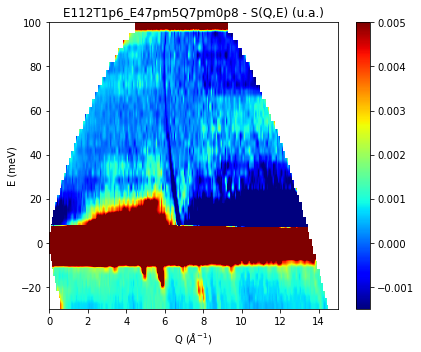

In [17]:
S_mask = np.array(S_mask)
S_arr1 = S_arr-S_mask/ratio.mean()

x= Q_arr
y= E_arr
z = S_arr1
X, Y = np.meshgrid(x, y)
Z = z.reshape(len(x), len(y))
Z = Z.transpose()
Z = np.flipud(Z)
fig =plt.figure(figsize=(6, 5))
plt.imshow(Z, aspect='auto', extent = [0,15,-30,100], vmin=-0.0015,vmax = 0.005, cmap='jet')# X, Y, Z,5000,vmin=0,vmax = 0.43, cmap='jet')
plt.colorbar()
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('E (meV)')
plt.title('E112T1p6_E47pm5Q7pm0p8 - S(Q,E) (u.a.)')
plt.tight_layout()
plt.show()
#fig.savefig('./figures/sub_E112T1p6.png')